# 비트와 바이트
- bit:   
컴퓨터에서 사용하는 가장 작은 데이터 단위, 하나의 비트는 2진수 1 또는 0으로 표현되어 데이터를 처리, 저장, 전송할 때 사용된다.  
- Byte:   
데이터 파일의 크기, 디스크 또는 그 외 저장 매체의 공간, 그리고 네트워크를 통하여 전송되는 데이터의 양을 표현하는데 사용 되는 측정 단위. (1바이트는 8비트와 같다.)

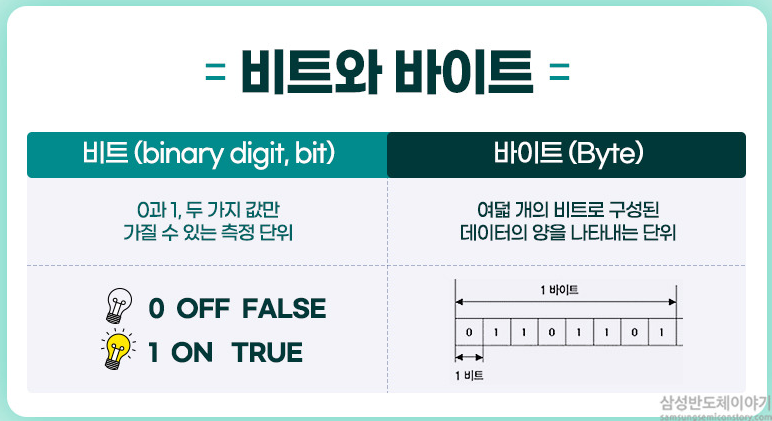

## 비트

In [ ]:
bin(13) # 10진수 13을 2진수로 변환

'0b1101'

In [ ]:
0b1101 # 2진수 1101을 10진수로 변환

13

## 바이트

In [ ]:
intlist = [64, 4, 26, 163, 255]

bytelist = bytes(intlist)
bytelist

b'@\x04\x1a\xa3\xff'

In [ ]:
[b for b in bytelist] 

[64, 4, 26, 163, 255]

# 텍스트 표현
컴퓨터는 이미 텍스트 문자를 ASCII(아스키 코드) 또는 UTF-8과 같은 인코딩을 사용하여 화면의 글꼴에 메핑되는 숫자로 나타내고 있습니다.

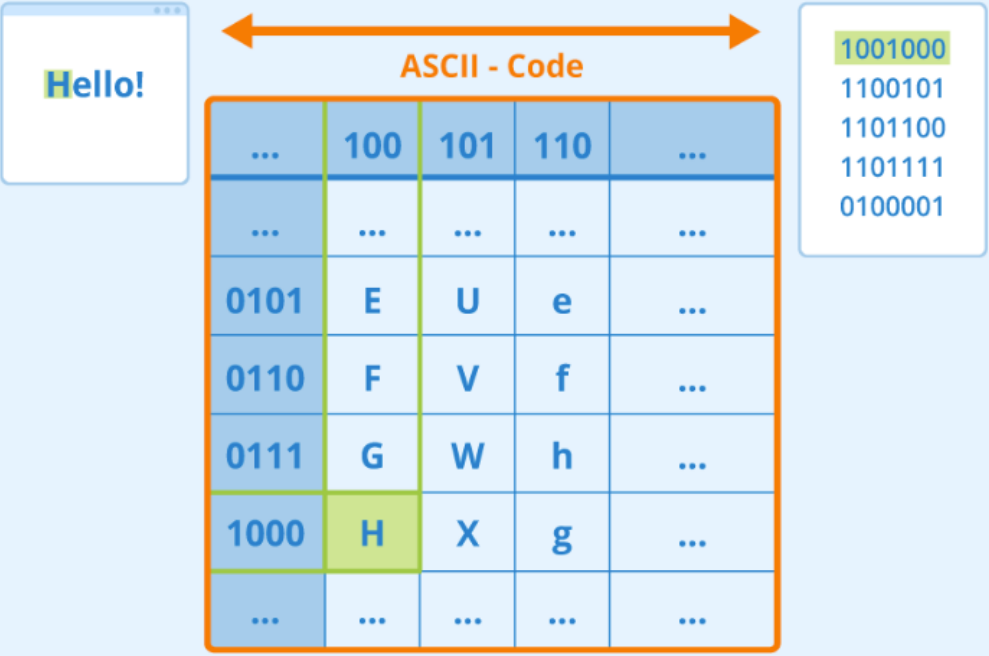

## [ASCII(아스키 코드)](https://namu.wiki/w/%EC%95%84%EC%8A%A4%ED%82%A4%20%EC%BD%94%EB%93%9C?from=ASCII) 

- 가장 처음 만들어진 인코딩이 ASCII 코드이다.
- 128개의 문자조합을 제공하는 7비트(1비트는 통신 에러 검출용) 부호
- 알파벳, 숫자, 특수기호 그외 컴퓨터에 필요한 몇 가지만이 정의되어 있어서 점차 여러 나라에서 컴퓨터를 사용하게 되고 통신이 발달하다보니 기존의 아스키 인코딩보다 더 많은 문자들을 정의한 새로운 인코딩이 필요해짐  

## [Unicode(유니 코드)](https://namu.wiki/w/%EC%9C%A0%EB%8B%88%EC%BD%94%EB%93%9C)

- 각 나라별 언어를 모두 표현하기 위해 나온 코드 체계가 유니코드  
- 사용중인 운영체제, 프로그램, 언어에 관계 없이 문자마다 고유한 코드 값을 제공하는 새로운 개념의 코드  
- UTF-8 (가변길이 인코딩):   
utf-8은 가장 많이 사용되는 가변 길이 유니코드 인코딩이다.

`ord()`를 통해 문자를 아스키 코드로 변환할 수 있다.

In [ ]:
ord('한')

54620

`chr()`를 통해 아스키 코드를 문자로 변환할 수 있다.

In [ ]:
chr(54620)

'한'

## Nuicode Normalization(유니코드 정규화)

파이썬으로 텍스트 전처리를 하다가 정규식으로 한글 영어만 추출할 때, 가끔 데이터가 None이 되는 경우가 많이 발생한다.   
그런 경우에는 대부분 같은 문자이지만 `아스키 코드가 달라서` 발생하는 문제들이다.   

이런 이슈(오류)들을 피하기 위해서 유니코드 정규화를 해야 한다.

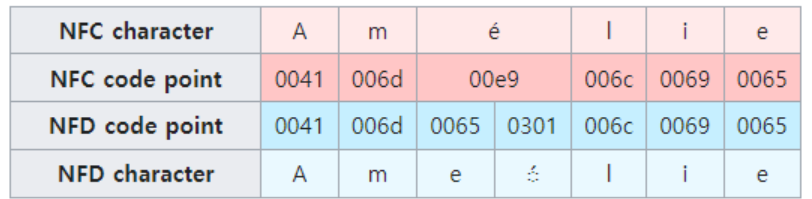

In [ ]:
import unicodedata

- NFC(Normal From Composed):   
구성된 문자 반환

In [ ]:
unicodedata.normalize('NFC', 'Hello')

'Hello'

- NFD(Normal Form Decomposed):   
분해, 결합된 문자 제공

In [ ]:
unicodedata.normalize('NFD', 'Hello')

'Hello'

- unicodedata.category(chr):   
> chr 문자에 할당된 일반 범주(general category)를 문자열로 반환합니다.
> - `Mn`: Mark, no spacing(발음구별기호)
> - `LI`: Letter, lower case 
> - `Lu`: Letter, upper case

In [ ]:
unicodedata.category('c')

'Ll'

In [ ]:
unicodedata.category('C')

'Lu'

In [ ]:
import string

string.ascii_letters

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [ ]:
all_letters = string.ascii_letters + " .,;'"
all_letters

"abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'"

In [ ]:
# 유니코드 문자열을 ASCII로 변환
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'  # Mn은 Mark, no spacing 를 뜻함.
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

Slusarski


# 인코딩과 디코딩

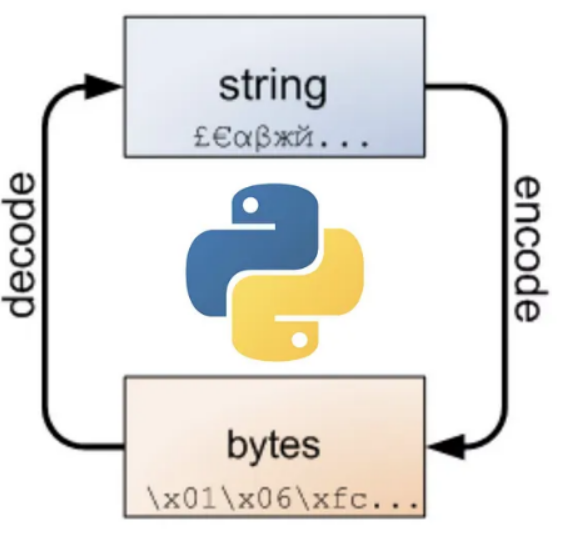

### 인코딩   
> 문자열을 바이트코드로 변환

파이썬에서 문자열은 유니코드로 처리합니다. 따라서 인코딩한다는 의미는 유니코드를 `utf-8`, `euc-kr`, `ascii` 형식의 `byte 코드`로 변환하는 것을 의미합니다. 

In [ ]:
korean_str = '한글'

encoded = korean_str.encode('utf-8')
encoded

b'\xed\x95\x9c\xea\xb8\x80'

In [ ]:
encoded = korean_str.encode('euc-kr')
encoded

b'\xc7\xd1\xb1\xdb'

### 디코딩    
> 바이트 코드를 문자열로 변환

파이썬에서 디코딩한다는 것은 byte 코드를 유니코드로 변환한다는 것을 뜻합니다. 

In [ ]:
korean_str = b'\xed\x95\x9c\xea\xb8\x80'

decoded = korean_str.decode('utf-8')
decoded

'한글'

In [ ]:
korean_str = b'\xc7\xd1\xb1\xdb'

decoded = korean_str.decode('euc-kr')
decoded

'한글'

## base64
바이너리 데이터를 ASCII 문자만으로 표현하기 위해 만들어진 인코딩 방법이다. ASCII 문자 하나가 64진법 숫자 하나를 의미하기 때문에 base64라는 이름을 가지게 되었다.   

파이썬에서는 base64 모듈을 통해서 인코딩과 디코딩을할 수 있다.

In [ ]:
import base64

인코딩

In [ ]:
import base64

str = '안녕?'
bytes = str.encode('UTF-8')

result = base64.b64encode(bytes)
result_str = result.decode('ascii')

print(result_str)

7JWI64WVPw==


디코딩

In [ ]:
import base64

code = '7JWI64WVPw=='
code_bytes = code.encode('ascii')

decoded = base64.b64decode(code_bytes)
str = decoded.decode('UTF-8')

print(str)

안녕?


## URL 인코딩/디코딩

In [ ]:
from urllib import parse

In [ ]:
nave_str = "https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EC%95%88%EB%85%95%ED%95%98%EC%84%B8%EC%9A%94"

In [ ]:
decoding_url = parse.unquote(nave_str)
decoding_url

'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=안녕하세요'

In [ ]:
incoding_url = parse.quote(decoding_url)
incoding_url

'https%3A//search.naver.com/search.naver%3Fwhere%3Dnexearch%26sm%3Dtop_hty%26fbm%3D1%26ie%3Dutf8%26query%3D%EC%95%88%EB%85%95%ED%95%98%EC%84%B8%EC%9A%94'

# [정규표현식](https://wikidocs.net/1669)
정규 표현식(Regular Expressions)은 복잡한 문자열을 처리할 때 사용하는 기법으로, 파이썬만의 고유 문법이 아니라 문자열을 처리하는 모든 곳에서 사용한다. 

## 정규표현식 문법

### 메타 문자 
> . ^ $ * + ? { } [ ] \ | ( )

- 정규 표현식에서 사용하는 메타 문자
- 메타 문자는 원래 그 문자가 가진 뜻이 아닌 특별한 용도로 사용하는 문자를 말한다. 


### 문자 클래스 `[]`
- 문자 클래스를 만드는 메타 문자인 `[]` 사이에는 어떤 문자도 들어갈 수 있다.
- `[]`안의 두 문자 사이에 하이픈(-)을 사용하면, 두 문자 사이의 범위(from - to)를 의미한다. 다음은 하이픈(-)을 사용한 예이다. (`^`은 not을 의미한다.)  
  - `[a-zA-Z]`: 알파벳 모두 
  - `[0-9]`: 숫자 
  - `[^0-9]`: 숫자가 아닌 문자 

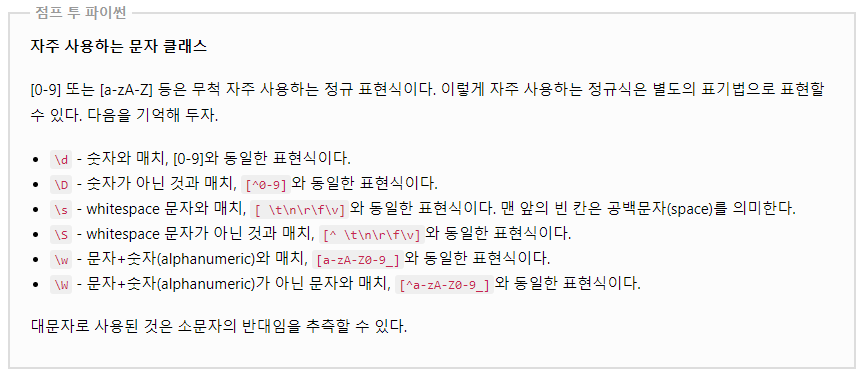

In [11]:
import re 

txt = "a1b2c3d4e5"

pat = re.compile("[a-zA-Z]")
pat.findall(txt)

['a', 'b', 'c', 'd', 'e']

In [3]:
pat = re.compile("\D")
pat.findall(txt)

['a', 'b', 'c', 'd', 'e']

In [12]:
pat = re.compile("[0-9]")
pat.findall(txt)

['1', '2', '3', '4', '5']

In [13]:
pat = re.compile("\d")
pat.findall(txt)

['1', '2', '3', '4', '5']

### Dot(.)
정규 표현식의 Dot(.) 메타 문자는 줄바꿈 문자인 `\n`을 제외한 모든 문자와 매치됨을 의미한다.    
> 정규식을 작성할 때, re.DOTALL 옵션을 주면 `\n` 문자도 매치된다.  

다음 정규식을 보자.  
```python
a.b
```
위 정규식의 의미는 다음과 같다. 
> "a+모든문자+b"

In [7]:
import re 

txt = "a0b" # a와 b 문자 사이에 하나의 문자 존재

pat = re.compile("a.b")
pat.findall(txt)

['a0b']

In [8]:
txt = "abcd" # a와 b 문자 사이에 하나의 문자 없음

pat = re.compile("a.b")
pat.findall(txt)

[]

In [9]:
txt = "accb" # a와 b 문자 사이에 2개 이상의 문자 존재

pat = re.compile("a.b")
pat.findall(txt)

[]

### 반복(*)
```python
ca*t
```
이 정규식에는 반복을 의미하는 `*` 메타 문자가 사용되었다. `*` 바로 앞에 있는 문자 a가 0부터 무한대로 반복될 수 있다는 의미이다. 

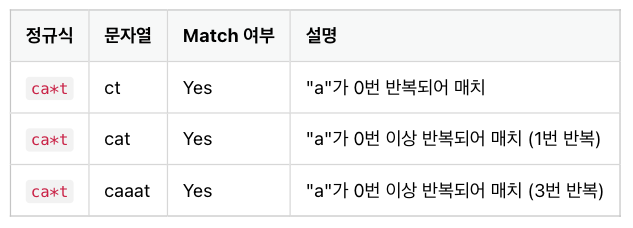

In [15]:
import re 

txt = "at"

pat = re.compile("ca*t")
pat.findall(txt)

[]

In [16]:
txt = "act"

pat = re.compile("ca*t")
pat.findall(txt)

['ct']

In [17]:
txt = "acaaat"

pat = re.compile("ca*t")
pat.findall(txt)

['caaat']

### 반복(+)
반복을 나타내는 또 다른 메타 문자로 `+`가 있다. `+`는 최소 1번 이상 반복될 때 사용된다. 즉 `*`가 반복 횟수 0부터라면, `+`는 반복 횟수 1부터인 것이다.

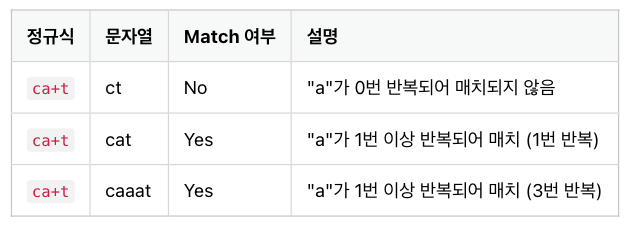

In [19]:
import re 

txt = "act"

pat = re.compile("ca+t")
pat.findall(txt)

[]

In [20]:
txt = "acaaat"

pat = re.compile("ca+t")
pat.findall(txt)

['caaat']

### 반복({m,n},?)
반복 횟수를 3회만 또는 1회부터 3회까지만으로 제한하고 싶을 수도 있지 않을까?   
- `{m}` 메타 문자를 사용하면 m번 반복 횟수를 고정할 수 있다. 

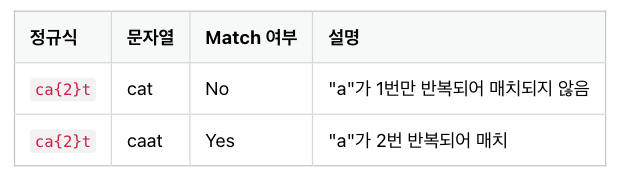

In [28]:
import re 

txt = "caaat"

pat = re.compile("ca{3}t")
pat.findall(txt)

['caaat']

- `{m,n}` 정규식을 사용하면 반복 횟수가 m부터 n까지 매치할 수 있다. 또한 m 또는 n을 생략할 수도 있다.   
> `{1,}`은 `+`와 동일하고, `{0,}`은 `*`와 동일하다.

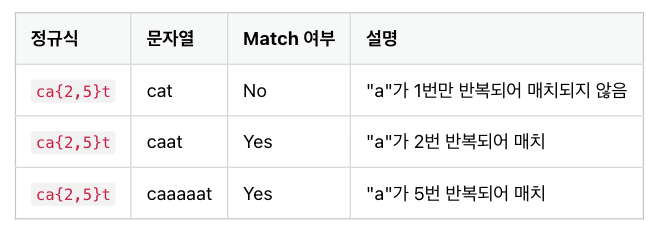

In [26]:
txt = "act"

pat = re.compile("ca{1,}t") # +과 동일
pat.findall(txt)

[]

In [27]:
pat = re.compile("ca{0,}t") # *과 동일
pat.findall(txt)

['ct']

- `?` 정규식을 사용하면 `{0,1}`을 의미한다.  
```python
ab?c
```
> "a+b(있어도 되고 없어도 된다.)+c"

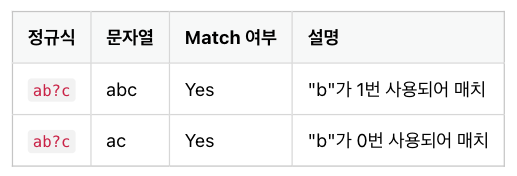

In [29]:
import re 

txt = "caaat"

pat = re.compile("ca?t")
pat.findall(txt)

[]

In [30]:
txt = "ct"

pat = re.compile("ca?t")
pat.findall(txt)

['ct']

In [31]:
txt = "cat"

pat = re.compile("ca?t")
pat.findall(txt)

['cat']

## re 모듈
파이썬은 정규 표현식을 지원하기 위해 re(regular expression) 모듈을 제공한다.   
```python
import re

pat = re.compile('ab*')
```
- re.compile을 사용하여 정규 표현식을 컴파일한다.   
- re.compile의 결과로 돌려주는 객체(pat)를 사용하여 그 이후의 작업을 수행할 것이다.  


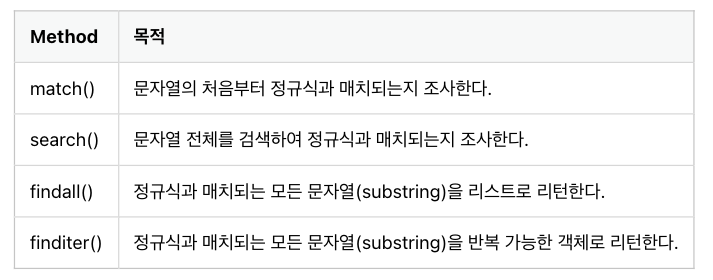

- match(), search(), finditer()의 리턴 메서드입니다.

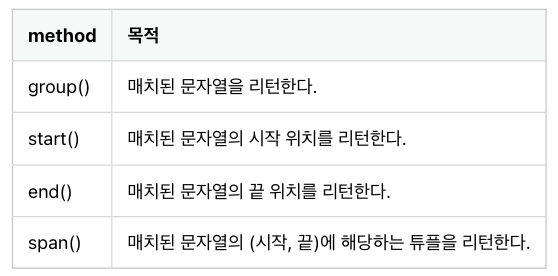

### match()
첫 문자에서 매칭이되어야만 한다.

In [50]:
import re 

txt = '123abc'

pat = re.compile('ab+c')

result = pat.match(txt)
if result:
  print(result.group())
else:
  print('None')

None


In [51]:
txt = 'abc123'

pat = re.compile('ab+c')

result = pat.match(txt)
if result:
  print(result.group())
else:
  print('None')

abc


### search()
match()는 첫문자에서 매칭이되어야 하지만, search()는 전체 중에서 매칭이되어야 한다.

In [52]:
txt = '123abc'

pat = re.compile('ab+c')

result = pat.search(txt)
if result:
  print(result.group())
else:
  print('None')

abc


In [54]:
txt = 'abc123'

pat = re.compile('ab+c')

result = pat.search(txt)
if result:
  print(result.group())
else:
  print('None')

abc


### findall()

In [57]:
import re 

txt = '123abc123abc123abc'

pat = re.compile('ab+c')

result = pat.findall(txt)
result

['abc', 'abc', 'abc']

### finditer()

In [61]:
import re 

txt = '123abc123abc123abc'

pat = re.compile('ab+c')

result = pat.finditer(txt)
result

In [62]:
for r in result:
  print(r.group())

abc
abc
abc


## re 모듈 컴파일 옵션  


### DOTALL(S)
`.`이 줄바꿈 문자를 포함하여 모든 문자와 매치할 수 있도록 한다.

In [63]:
import re 

p = re.compile('a.b')
p.match('a\nb')

In [71]:
p = re.compile('a.b', re.DOTALL)
p.match('a\nb')

<re.Match object; span=(0, 3), match='a\nb'>

### IGNORECASE(I)
대소문자에 관계없이 매치할 수 있도록 한다.

In [75]:
p = re.compile('[a-z]+')

p.match('Hello')

In [74]:
p = re.compile('[a-z]+', re.I)

p.match('Hello')

<re.Match object; span=(0, 5), match='Hello'>

### MULTILINE(M)
여러줄과 매치할 수 있도록 한다. (`^`, `$` 메타문자의 사용과 관계가 있는 옵션이다.)
- `^`:   
문자열의 처음을 의미한다.
- `$`:   
문자열의 마지막을 의미한다.

In [76]:
data = """python one
life is too short
python two
you need python
python three"""

p = re.compile("^python\s\w+")
p.findall(data)

['python one']

In [77]:
p = re.compile("^python\s\w+", re.MULTILINE)
p.findall(data)

['python one', 'python two', 'python three']

## 정규표현식을 사용하지 않은 예

In [32]:
data = "나의 전화번호는 010-0000-0000 입니다. 너의 전화번호는 010-1111-1111 입니다."

phone_list = []
for item in data.split():
    item = item.split("-")

    cond_list = []
    if len(item) == 3:
        cond = item[0].isdigit() and len(item[0]) == 3
        cond_list.append(cond)
        cond = item[1].isdigit() and len(item[1]) == 4
        cond_list.append(cond)
        cond = item[2].isdigit() and len(item[2]) == 4
        cond_list.append(cond)

    if sum(cond_list) == 3:
        phone_list.append("-".join(item))
phone_list

['010-0000-0000', '010-1111-1111']

## 정규표현식을 사용한 예

In [34]:
import re 

data = "나의 전화번호는 010-0000-0000 입니다. 너의 전화번호는 010-1111-1111 입니다."

pat = re.compile("\d{3}-\d{4}-\d{4}")
pat.findall(data)

['010-0000-0000', '010-1111-1111']